# Welcome to the Encryption Workshop

## 0.1 Setup Stuff - You must run these blocks first

In [43]:
!pip install cryptography

In [44]:
%reload_ext autoreload
%autoreload 2



# Task 1 Dependencies
from text_util import *

# Task 2 Dependencies
from sub_encryption import *
from cryptography.fernet import Fernet
from Alice import *
from PasswordCracker import *
import base64
# Task 3 Dependencies
import matplotlib.pyplot as plt

# Task 1.1 - Caesar Ciphers!


### The Romans have ciphered again! It is our objective to find out what the pesky Romans are up to.

#### Below is the encryption, loaded from a text file, that we need to decipher. Your guide will help you understand how anciet roman encryption tools work in order to find the answer.

######  if you're really stuck, do what a developer does: google it :)

In [45]:
task1_text = get_task_text("task1")

print("Encrypted Text:\n")

print(task1_text)

Encrypted Text:

li kh kdg dqbwklqj frqilghqwldo wr vdb, kh zurwh lw lq flskhu, wkdw lv, eb vr fkdqjlqj wkh rughu ri wkh ohwwhuv ri wkh doskdehw, wkdw qrw d zrug frxog eh pdgh rxw.


In [46]:
# This function will be used to text whether you solution is correct

def shift_text(text, shift):
    
    if not isinstance(shift, int):
        print("Input must be an number!")
        return
    
    caesar_text_list = text.split(" ")
    shifted_text = []
    
    for word in caesar_text_list:
        shifted_word = ""
        for char in word:
            if not char.isalnum():
                shifted_word += char
                continue
            if(char.isupper()):
                shifted_word += chr((ord(char) + shift - 65) % 26 + 65)
            else:
                shifted_word += chr((ord(char) + shift - 97) % 26 + 97)
        shifted_text.append(shifted_word)
        
        
    return " ".join(shifted_text)


In [49]:
text = "if he had anything confidential to say, he wrote it in cipher, that is, by so changing the order of the letters of the alphabet, that not a word could be made out."

print(shift_text(task1_text, 0))



li kh kdg dqbwklqj frqilghqwldo wr vdb, kh zurwh lw lq flskhu, wkdw lv, eb vr fkdqjlqj wkh rughu ri wkh ohwwhuv ri wkh doskdehw, wkdw qrw d zrug frxog eh pdgh rxw.


# Task 1.2: Social Engineering

### Sometimes you cannot break a code, but the password information to decipher it cab be found in the public domain!

#### Alice has a long password and a longer hint to remember it, but with her public online information and help from a password cracker, we can access her valuable information! Hooray! Crack Alices Password to decipher her message.

##### Below is the first function that shows what Alice's password hint is, use the syntax below to output other parts of her data to deduce what her password can be.

In [42]:
alice = Alice()

# The variable "alice" has methods that output vital information to discover her password

# By typing "alice." and pressing tab, you can find the names of these methods


print("This is an example print statement, you will not need the quotation marks when printing Alice's information\n\n")



alice.show_hint()

This is an example print statement, you will not need the quotation marks when printing Alice's information


my favourite creature + best album + birthyear + Maiden Name, In any order!!!!


## Password Cracker

### You may have the keywords of the password, but guessing their order would take FOREVER!

##### Given you know all 4 key phrases, there are 24 unique combinations, that will take too long to input! By putting these phrases into the "crack_password" function, you can test each combination to guess her password faster!

In [54]:

%reload_ext autoreload
%autoreload 2

alices_secret_message = b'gAAAAABkE027pkk_afz0IdZH-A1ohmwvV1OB6FwY2tP59XEAtZXWYYJpEe9yqGnqViyuwYogUY4fOGvjSeoC1ZTBI-bakE1CAuMVOUdSitHfaB_ji22zrWJeh3us0czwdDkIf2ZFEHr-nsmBoJ-ykrqaNi9rPyPn2GDcX1ubRHllNrl2DmUO842STMNr6zkrsQ_QeswCelACVCN2WB9EtdIv1RL4yXCDwbJNoX32-PzZSo7yOcGTuj0RMnmGdHFIoEZXWjTpx2E6MLmT38QHwMj3VROKbfxKZSeD-mTFcIWFBaH4cNVhnskTNmCA2ESfotSu0S_Ud5dkXl09mg_lxFYz23cYtk1pNtd-3Tov4BqLvtZfILUPrps='

p = PasswordCracker()

p.crack_password(["a", "b", "c", "d"])

# you put the secret key in the Fernet()

f = Fernet()

alices_secret_message = f.decrypt(alices_secret_message)

print(alices_secret_message)



Trying the combination: abcd

This combination was incorrect, try again.

Trying the combination: abdc

This combination was incorrect, try again.

Trying the combination: acbd

This combination was incorrect, try again.

Trying the combination: acdb

This combination was incorrect, try again.

Trying the combination: adbc

This combination was incorrect, try again.

Trying the combination: adcb

This combination was incorrect, try again.

Trying the combination: bacd

This combination was incorrect, try again.

Trying the combination: badc

This combination was incorrect, try again.

Trying the combination: bcad

This combination was incorrect, try again.

Trying the combination: bcda

This combination was incorrect, try again.

Trying the combination: bdac

This combination was incorrect, try again.

Trying the combination: bdca

This combination was incorrect, try again.

Trying the combination: cabd

This combination was incorrect, try again.

Trying the combination: cadb

This com

TypeError: __init__() missing 1 required positional argument: 'key'

# Task 1.3: Frequency analysis

## Sometimes pen and paper alone doesn't cut it for decrypting documents, thats where frequency analysis comes into play

#### All text, as its length increases, adheres to a pattern. Letters like E and A are very common, whereas letters like Z and J are very rare. The "typical" distribution can be compared to the distribution of letters in the encrypted text, if it is large enough.

##### Below is a graph that shows the typical letter frequency calculated through 100s of books, compared to the letter frequency of our large encrypted text (labeled task3). Since we have so much encrypted text, we can try and match the occurances of certain letters and crack the code.

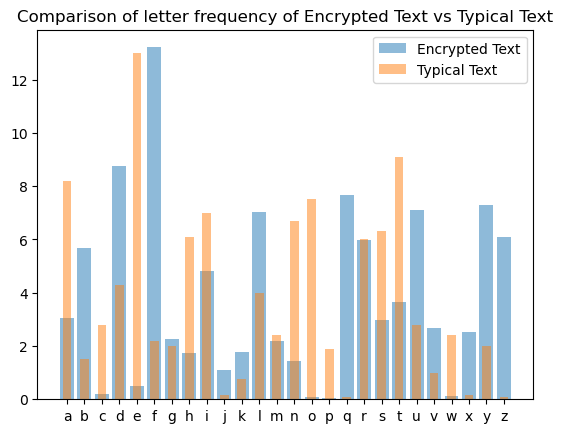

In [55]:
typical_letter_frequency = [8.2, 1.5, 2.8, 4.3, 13, 2.2, 2, 6.1, 7, 0.15, 0.77, 4, 2.4, 6.7, 7.5, 1.9, 0.095, 6, 6.3, 9.1, 2.8, 0.98, 2.4, 0.15, 2, 0.074]

letter_occurances = {}

punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

allowedCharacters = "abcdefghijklmnopqrstuvwxyz";
# Removing punctuations in string
# Using loop + punctuation string

barWidth = 0.5
 
# printing result

task3 = get_task_text("task3")

for letter in task3:
    if not letter.isalpha():
        continue
    if letter not in letter_occurances:
        letter_occurances[letter.lower()] = 1
    else:
        letter_occurances[letter.lower()] += 1
        
for letter in allowedCharacters:
    if letter not in letter_occurances.keys():
        letter_occurances[letter] = 0
    
size = sum(letter_occurances.values())

for key in letter_occurances:
    letter_occurances[key] = letter_occurances[key] / size * 100

    
letter_occurances = {key: value for key, value in sorted(letter_occurances.items())}

plt.bar(range(len(letter_occurances)), list(letter_occurances.values()), alpha = 0.5, label = "Encrypted Text")
plt.bar(range(len(typical_letter_frequency)), typical_letter_frequency, alpha = 0.5, width = barWidth, label = "Typical Text")
plt.xticks(range(len(letter_occurances)), list(letter_occurances.keys()))

plt.title('Comparison of letter frequency of Encrypted Text vs Typical Text')
plt.legend()

plt.show()

In [32]:
# By comparing the letter frequencies, try your best to decipher this sentance
task3text = "mftt iylf, gys bqjf zsvvfzzxsttg ifvyifi dbuz afzzqhf, dbf zfvrfd kbrqzf uz qtkbq tfasr qtkbq lyjfanfr."
